# PRODUCT SALE ANALYSIS

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

## Importing the dataset

In [2]:
df = pd.read_excel(r'C:\Users\VERSHA\product sales analysis\Order_details(masked).xlsx')
df

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46
...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03
577,PERSON_523,PERSON_523@gmail.com,PRODUCT_8,07/03/2021 23:55:01
578,PERSON_523,PERSON_523@gmail.com,"PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...",07/03/2021 23:58:24
579,PERSON_524,PERSON_524@gmail.com,"PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...",07/03/2021 23:59:26


## Describing the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


In [4]:
df.shape

(581, 4)

In [5]:
df.describe()

,Name,Email,Product,Transaction Date
count,581,581,581,581
unique,525,525,252,581
top,PERSON_470,PERSON_470@gmail.com,PRODUCT_75,06/03/2021 11:46:39
freq,5,5,74,1


* As the product column contains all the bought products at a time in each row, so we need to separate it into distinct rows
* unique values in Name and Email column is less than their total values which indicates repetition in customer visits
* There are no duplicate values in Transaction Date column, which indicates no duplicate transaction

## Checking for NaN values

In [6]:
df.isnull().sum()

Name                0
Email               0
Product             0
Transaction Date    0
dtype: int64

*There are no null values so analysis can be started*

## Preparing the data 

**Analyse top five rows of the dataset**

In [7]:
df.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


* Product column needs to be separated into distinct rows so that each product detail is clearly visible.
* Since the column is in object type, it needs to be changed into string type and then using split function it can be separated
* A new dataframe can be declared for the task

In [8]:
df1 = pd.DataFrame(df)

In [9]:
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')

In [10]:
print(df1['Product'].nunique())

95


Here, we can see the number of unique products is **95** 

We also need to change the Transaction Date column into datetime for proper time based analysis

In [11]:
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')

* Using to_datetime funtion we can change it to the time format 

##  Data Visualization

Here, we're going to analyse the data and based on that answer some relevant questions to generate marketing insights.

### 1. What is the overall sale trend?

Sale trend or patterns can help us analyse opportunities and potential problems and gives an insight to inner working of business. Sale performance tracking helps us make timely business decisions.

To answer this question we need to extract the Date from Transaction Date column and count the number of products sold on each day.

* we will use dt.date on Transaction Date to extract date from the timestamps
* After this, we will group date and product column on basis of date and count products sold using count function


In [12]:
df1 = pd.DataFrame(df)
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')

In [13]:
df1['Date'] = df1['Transaction Date'].dt.date

In [14]:
#product sale count on each day
df1[['Date',  'Product']].groupby(['Date']).count()

,Product
Date,
2021-03-01,64
2021-03-02,59
2021-03-03,191
2021-03-04,162
2021-03-05,188
2021-03-06,225
2021-03-07,460


as we can see the above result shows a sale trend which can now be visualised

Text(0.5, 0, 'Date')

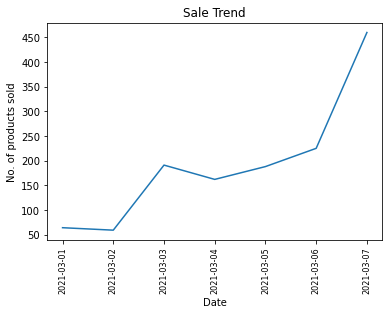

In [15]:
import matplotlib.pyplot as plt
import numpy as np

date = df1['Date'].unique()

res = df1.groupby('Date').count()

plt.plot(date,res['Product'])

plt.title('Sale Trend')
plt.xticks(date,rotation='vertical', size=8)
plt.ylabel('No. of products sold')
plt.xlabel('Date')

*The above graph shows the sale trend in a week*

**Conclusion-**
* A sale spike can be seen during the last two days where the count went from 188 to 460 in two days
* Sales were comparatively lesser during the initial days


### 2. What are the most sold products?

The star products of the week are the ones selling in highest quantity. Such products benefit to sales the most. Having knowledge of these products can be used to advertise the sale and also to recommend these to the buyers. This will further enhance overall market popularity and impact over the buyers who could look forward to the future sales, thus building customer relations.

For this, number of customers buying each sold product could be counted and then sorted in descending order to get the topmost selling products

* Firstly, Name column is grouped on Product columnn and counted using count function
* sorting the above gives highest selling products 

In [16]:
df1 = pd.DataFrame(df)
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')

In [17]:
#top 10 products sold based on the number of  customers who bought them
df1[['Product', 'Name']].groupby('Product').count().sort_values(by = 'Name', ascending = False).head(20)

,Name
Product,
PRODUCT_75,121
PRODUCT_63,97
PRODUCT_27,76
PRODUCT_25,59
PRODUCT_12,52
PRODUCT_74,49
PRODUCT_34,44
PRODUCT_68,32
PRODUCT_57,30


[Text(0, 0, 'PRODUCT_75'),
 Text(1, 0, 'PRODUCT_63'),
 Text(2, 0, 'PRODUCT_27'),
 Text(3, 0, 'PRODUCT_25'),
 Text(4, 0, 'PRODUCT_12'),
 Text(5, 0, 'PRODUCT_74'),
 Text(6, 0, 'PRODUCT_34'),
 Text(7, 0, 'PRODUCT_68'),
 Text(8, 0, 'PRODUCT_57'),
 Text(9, 0, 'PRODUCT_85')]

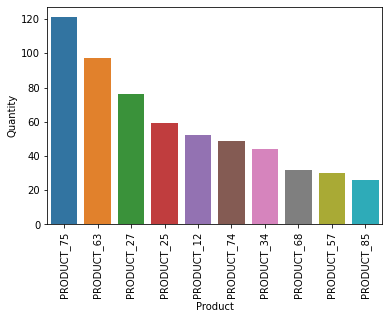

In [18]:
res = pd.DataFrame(df1)
res['Quantity'] = res.groupby(['Product'])['Name'].transform('count')
res = res.drop_duplicates(subset=['Product'])
res = res.sort_values(by = 'Quantity', ascending = False).head(10)
import seaborn as sns
pl = sns.barplot(x = 'Product', y= 'Quantity', data=res)
pl.set_xticklabels(pl.get_xticklabels(),rotation=90)

**Conclusion**

* **PRODUCT_75** sold the most during the sale, with **121** units in total
* PRODUCT_63, PRODUCT_27, PRODUCT_25 and PRODUCT_12 are also among the top products

### 3. What are the least sold products?

Few products might not perform well in the market. This data can be helpful in realising those sale drawbacks that caused this. There may be many reasons behind a failing product such as insufficient market research, bad timing, overprimising, etc.

This can be found by

* By sorting the previous result in ascending instead would give the least sold products

In [19]:
df1 = pd.DataFrame(df)
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')

In [20]:
#bottom 10 products sold based on number of customers who bought them
df1[['Product', 'Name']].groupby('Product').count().sort_values(by = 'Name', ascending = True).head(10)

,Name
Product,
PRODUCT_93,1
PRODUCT_13,1
PRODUCT_67,1
PRODUCT_45,1
PRODUCT_17,1
PRODUCT_73,1
PRODUCT_82,1
PRODUCT_1,2
PRODUCT_56,2


[Text(0, 0, 'PRODUCT_17'),
 Text(1, 0, 'PRODUCT_45'),
 Text(2, 0, 'PRODUCT_82'),
 Text(3, 0, 'PRODUCT_73'),
 Text(4, 0, 'PRODUCT_93'),
 Text(5, 0, 'PRODUCT_13'),
 Text(6, 0, 'PRODUCT_67'),
 Text(7, 0, 'PRODUCT_44'),
 Text(8, 0, 'PRODUCT_29'),
 Text(9, 0, 'PRODUCT_50')]

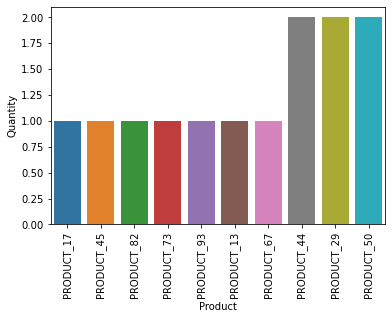

In [21]:
res = pd.DataFrame(df1)
res['Quantity'] = res.groupby(['Product'])['Name'].transform('count')
res = res.drop_duplicates(subset=['Product'])
res = res.sort_values(by = 'Quantity', ascending = True).head(10)
import seaborn as sns
pl = sns.barplot(x = 'Product', y= 'Quantity', data=res)
pl.set_xticklabels(pl.get_xticklabels(),rotation=90)

**Conclusion**

* PERSON_17, PERSON_45, PERSON_82, PERSON_73, PERSON_93, PERSON_13 and PERSON_67 are among the least selling products
 

### 4. What is the total sale?

In [22]:
#total no. of products sold
df1[['Product', 'Name']].groupby('Product').count().sum()

Name    1349
dtype: int64

The total number of products sold during the founder's day sale is **1349**. But this value cannot be used to give profit/loss percentage as we cannot know from this data the exact number of each product in stock. Instead it can be used to predict range of stock that could be manufactured beforehand without having any loss at it.

### 5. Who were the top buyers of the week?

We have found the loyal set of customers who are attracted by the product quality or sale prices. They can be approached later with special offers for being topmost buyers of the week and gaining company's trust.

The Name and product column again should be taken into account but here, its the Name column on which grouping must be done and count perfomed on Product column. Then, sorting the values we will get the top customers of the week. 

In [23]:
#top 10 customers based on number of products each of them purchased
df1[['Name', 'Product']].groupby('Name').count().sort_values(by = 'Product', ascending = False).head(10)

,Product
Name,
PERSON_310,47
PERSON_330,32
PERSON_470,31
PERSON_522,25
PERSON_523,22
PERSON_170,18
PERSON_410,16
PERSON_8,16
PERSON_521,16


[Text(0, 0, 'PERSON_310'),
 Text(1, 0, 'PERSON_330'),
 Text(2, 0, 'PERSON_470'),
 Text(3, 0, 'PERSON_522'),
 Text(4, 0, 'PERSON_523'),
 Text(5, 0, 'PERSON_170'),
 Text(6, 0, 'PERSON_8'),
 Text(7, 0, 'PERSON_521'),
 Text(8, 0, 'PERSON_410'),
 Text(9, 0, 'PERSON_283')]

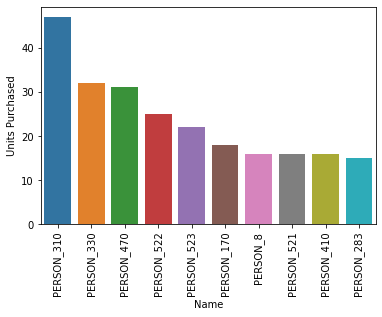

In [24]:
res = pd.DataFrame(df1)
res['Units Purchased'] = res.groupby(['Name'])['Product'].transform('count')
res = res.drop_duplicates(subset=['Name'])
res = res.sort_values(by = 'Units Purchased', ascending = False).head(10)
import seaborn as sns
pl = sns.barplot(x = 'Name', y= 'Units Purchased', data=res)
pl.set_xticklabels(pl.get_xticklabels(),rotation=90)

**Conclusion**

* **PERSON_310** is the top buyer in terms of products bought during the sale
* The above customer bought 47 products in total
* PERSON_330,PERSON_470,PERSON_522 and PERSON_523 are also among the top buyers of the sale week

### 5. Who were the weakest buyers of the week?

sorting the above in ascending order gets us the weakest buyers

In [25]:
#bottom 10 customers based on number of products each of them purchased
df1[['Name', 'Product']].groupby('Name').count().sort_values(by = 'Product', ascending = True).head(10)

,Product
Name,
PERSON_1,1
PERSON_325,1
PERSON_324,1
PERSON_323,1
PERSON_322,1
PERSON_321,1
PERSON_320,1
PERSON_32,1
PERSON_516,1


[Text(0, 0, 'PERSON_1'),
 Text(1, 0, 'PERSON_219'),
 Text(2, 0, 'PERSON_387'),
 Text(3, 0, 'PERSON_388'),
 Text(4, 0, 'PERSON_216'),
 Text(5, 0, 'PERSON_390'),
 Text(6, 0, 'PERSON_214'),
 Text(7, 0, 'PERSON_391'),
 Text(8, 0, 'PERSON_392'),
 Text(9, 0, 'PERSON_393')]

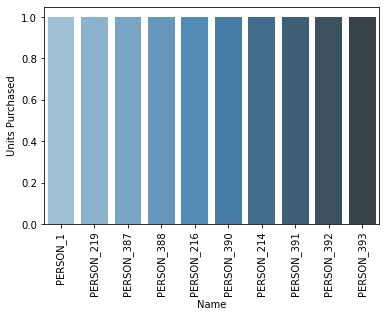

In [26]:
res = pd.DataFrame(df1)
res['Units Purchased'] = res.groupby(['Name'])['Product'].transform('count')
res = res.drop_duplicates(subset=['Name'])
res = res.sort_values(by = 'Units Purchased', ascending = True).head(10)
import seaborn as sns
pl = sns.barplot(x = 'Name', y= 'Units Purchased', data=res, palette = 'Blues_d')
pl.set_xticklabels(pl.get_xticklabels(),rotation=90)

### 6. Who were the customers re-visiting the sale?

Customers revisiting the sale to check out more products can be considered potentially loyal customers. This is the time that the sale performs well in their eyes to gain trust as this can be an indication to well-performing products bought earlier. Such customer's feedback can also be utilised.

To answer this, we need to first find the number of each customer's visits and sort them. People visiting more then once can be extracted from the result which should give the required data.

* for counting visits, groups are formed on Name and Transaction dates, which has already distinct rows, are counted for each customer
* it is then sorted using sort_values() and using the condition on dataframe, visits of more than once are extracted


In [27]:
df1 = pd.DataFrame(df)
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')

In [28]:
#Number of times each customer visited and bought products
df1[['Name','Transaction Date']].groupby(['Name']).count().head(10)

,Transaction Date
Name,
PERSON_1,1
PERSON_10,1
PERSON_100,4
PERSON_101,1
PERSON_102,2
PERSON_103,2
PERSON_104,2
PERSON_105,1
PERSON_106,1


In [29]:
#top 10 customer visits
df1=df1[['Name','Transaction Date']].groupby(['Name']).count().sort_values(by = 'Transaction Date', ascending = False)

In [30]:
#Customer who visited more than once
df1[(df1['Transaction Date']>1)].head(10)

,Transaction Date
Name,
PERSON_310,47
PERSON_330,32
PERSON_470,31
PERSON_522,25
PERSON_523,22
PERSON_170,18
PERSON_410,16
PERSON_8,16
PERSON_521,16


<AxesSubplot:xlabel='Visits', ylabel='Name'>

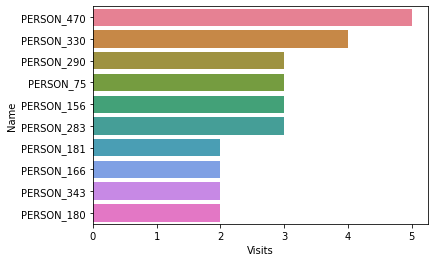

In [31]:
df1 = pd.DataFrame(df)
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')

res = pd.DataFrame(df1)
res['Quantity'] = res.groupby(['Name'])['Product'].transform('count')
res['Visits'] = df.groupby(['Name'])['Transaction Date'].transform('count')
res = res.sort_values(by = 'Visits', ascending = False)
res = res.drop_duplicates(subset=['Name'])
res = res.head(10)

sns.barplot(x = 'Visits', y= 'Name', data=res, palette='husl')

,Name,Email,Product,Transaction Date,Quantity,Visits
521,PERSON_470,PERSON_470@gmail.com,PRODUCT_2,2021-03-07 20:10:07,31,5
406,PERSON_330,PERSON_330@gmail.com,PRODUCT_61,2021-03-06 19:51:49,32,4
326,PERSON_290,PERSON_290@gmail.com,PRODUCT_4,2021-03-05 21:42:28,9,3
76,PERSON_75,PERSON_75@gmail.com,PRODUCT_42,2021-03-03 06:11:37,11,3
162,PERSON_156,PERSON_156@gmail.com,PRODUCT_8,2021-03-03 20:53:54,3,3


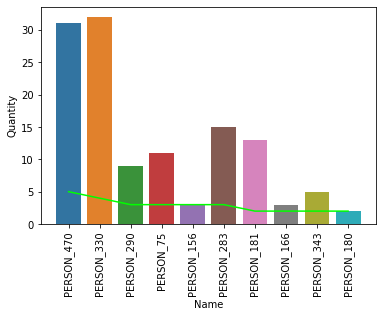

In [32]:
res = res.sort_values(by = 'Visits', ascending = False).head(10)
ax = sns.barplot(x = 'Name', y= 'Quantity', data=res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

sns.lineplot(x = 'Name', y = 'Visits',color = 'lime', data=res, ax=ax)
res.head(5)

,Name,Email,Product,Transaction Date,Quantity,Visits
328,PERSON_310,PERSON_310@gmail.com,PRODUCT_76,2021-03-05 21:49:46,47,1
353,PERSON_330,PERSON_330@gmail.com,PRODUCT_58,2021-03-06 11:37:18,32,4
521,PERSON_470,PERSON_470@gmail.com,PRODUCT_43,2021-03-07 20:10:07,31,5
576,PERSON_522,PERSON_522@gmail.com,PRODUCT_51,2021-03-07 23:53:03,25,1
578,PERSON_523,PERSON_523@gmail.com,PRODUCT_64,2021-03-07 23:58:24,22,2


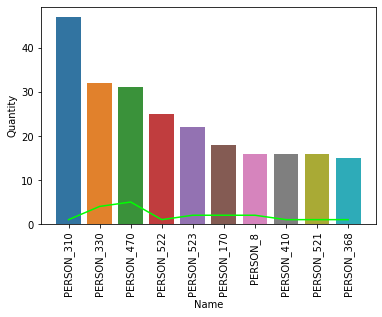

In [33]:
res = pd.DataFrame(df1)
res['Quantity'] = res.groupby(['Name'])['Product'].transform('count')
res['Visits'] = df.groupby(['Name'])['Transaction Date'].transform('count')
res = res.sort_values(by = 'Quantity', ascending = False)
res = res.drop_duplicates(subset=['Name'])
res = res.head(10)
ax = sns.barplot(x = 'Name', y= 'Quantity', data=res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

sns.lineplot(x = 'Name', y = 'Visits',color = 'lime', data=res, ax=ax)
res.head(5)

**Conclusion**

* total number of re-visiting cutomers is **47**
* maximum visits is 5 by cutomer **PERSON_470**
* maximum visiting customer is different from top customers



### 7. What are the other email ID's being used?

Other email IDs lets us know of the other existing potential buying communities. Corporate accounts are generally used for business purposes and can be accessed by anyone in authority while personal accounts can be used as per requirements.This can be useful in building customer relations.

This is done by grouping customers on mail IDs and performing count on Name column.

* Duplicate email ID's dropped
* mail names extracted from ID's and stored in a separate column mailName
* Name column grouped on mailName, values counted and sorted 

In [34]:
df1 = pd.DataFrame(df)
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')

In [35]:
df1 = df1.drop_duplicates(['Email'])

In [36]:
#other email ids being used
df1['mailName'] = df1.Email.str.split("@").str[1].str.split(".").str[0]

In [37]:
df1[['mailName','Name']].groupby(['mailName']).count().sort_values(by = 'Name', ascending = False).head(10)

,Name
mailName,
gmail,453
yahoo,17
hotmail,6
rediffmail,5
outlook,5
tatasteel,3
live,3
GMAIL,2
sxcce,2


**Conclusion**

* Other potential buyers found from tatasteel, gcl-intl, SGEI,greenkogroup, jshl, glbitm, docon, voltas, mcdermott,electrotherm, nitsikkim, kamalmotors, tataprojects, shubhadapolymers, ntpc, bitmesra, godrej, tatachemicals, altajirglass, chanderpur, moirasariya
* maximum customers use personal accounts such as gmail, yahoo, hotmail, etc while a fair amount of them use corporate emails too.

In [38]:
df1['mailName'] = df1.Email.str.split("@").str[1].str.split(".").str[0]

personal = ['gmail', 'yahoo','hotmail', 'rediffmail', 'ymail','GMAIL']
df1['mailType'] = df1['mailName'].apply(lambda x: 'personal' if x in personal else 'professional')

df1.head()

,Name,Email,Product,Transaction Date,mailName,mailType
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,2021-03-01 00:47:26,gmail,personal
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,2021-03-01 02:04:07,tataprojects,professional
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,2021-03-01 09:10:43,gmail,personal
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,2021-03-01 09:49:48,gmail,personal
4,PERSON_5,PERSON_5@gmail.com,PRODUCT_34,2021-03-01 10:56:46,gmail,personal


personal        484
professional     41
Name: mailType, dtype: int64


<AxesSubplot:xlabel='mailType', ylabel='count'>

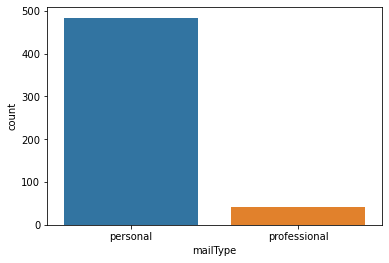

In [39]:
import seaborn as sns
df1 = df1.drop_duplicates(subset = 'Name')
print(df1['mailType'].value_counts())
sns.countplot(x='mailType',data=df1)

*distribution of products among personal and professional accounts*

In [40]:
df1.drop(df1[df1['mailName']=='gmail'].index, inplace=True)

professional    41
personal        31
Name: mailType, dtype: int64


<AxesSubplot:xlabel='mailType', ylabel='count'>

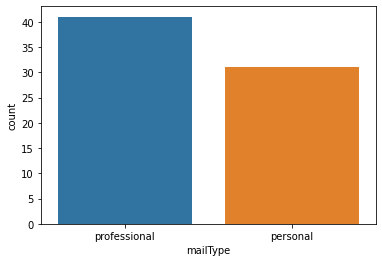

In [41]:
print(df1['mailType'].value_counts())
sns.countplot(x='mailType', data=df1)

In the above graph distribution id shown after eliminating 'gmail' accounts 

### 8. Distribution of sold units on basis of mail IDs

The number of products bought from different mail IDs will help understand behaviour of potential buyers. Product distribution on basis of personal and professional mail IDs will also give an idea about the product reach and market value.

* new dataframe declared and initialized with original dataset
* mail names extracted from ID's and stored in a separate column mailName
* Product column separated in each row
* grouping Product column on mailName, sort and count
* highest selling products taken into consideration


In [42]:
df1 = pd.DataFrame(df)
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
df1['mailName'] = df1.Email.str.split("@").str[1].str.split(".").str[0]
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')

In [43]:
#other potential customers
df1[['mailName','Product']].groupby(['mailName']).count().sort_values(by = 'Product', ascending = False).head(5)

,Product
mailName,
gmail,1148
yahoo,35
hotmail,24
tatasteel,21
chanderpur,15


In [44]:
personal = ['gmail', 'yahoo','hotmail', 'rediffmail', 'ymail','GMAIL']
df1['mailType'] = df1['mailName'].apply(lambda x: 'personal' if x in personal else 'professional')
df2= pd.DataFrame(df1)
df2['Quantity'] = df2.groupby('Product')['Name'].transform('count')

[Text(0, 0, 'PRODUCT_75'),
 Text(1, 0, 'PRODUCT_63'),
 Text(2, 0, 'PRODUCT_27'),
 Text(3, 0, 'PRODUCT_25'),
 Text(4, 0, 'PRODUCT_12')]

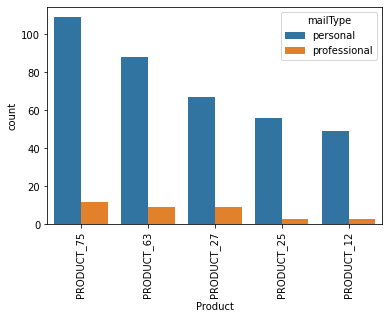

In [45]:
ax = sns.countplot(x='Product', hue='mailType', order=df2.Product.value_counts().iloc[:5].index, data=df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Above distribution shows overall communities interested in highest selling products. 

[Text(0, 0, 'PRODUCT_75'),
 Text(1, 0, 'PRODUCT_27'),
 Text(2, 0, 'PRODUCT_63'),
 Text(3, 0, 'PRODUCT_57'),
 Text(4, 0, 'PRODUCT_74')]

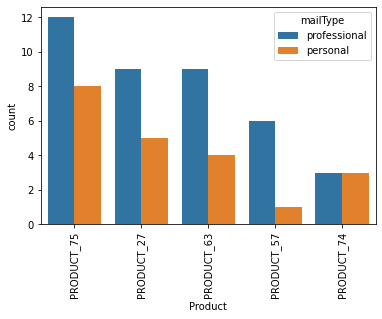

In [46]:
df2.drop(df2[df2['mailName']=='gmail'].index, inplace=True)
ax = sns.countplot(x='Product', hue='mailType', order=df2.Product.value_counts().iloc[:5].index, data=df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Since most of the people generally used 'gmail' as default mail address, eliminating that could give a better idea about different buying communities approaching the sale. The above graph shows product distribution on mail types, personal and professional 

### 9. Who are the bulk buying customers ?

Bulk buyers can be considered as retailers or distributers, or institutions providing training/internships in this case. This information can be used in approaching such institutes with collaboration offers.

* Keeping target of people buying more than 5 products at a time
* data of such customers is extracted by applying condition on Product count values and storing this in df2
* taking another variable df3 with original dataset, perform intersection on df2 and df3 



In [47]:
df1 = pd.DataFrame(df)

In [48]:
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')

In [49]:
df1 = df1[['Transaction Date','Product']].groupby(['Transaction Date']).count()

In [50]:
df1

,Product
Transaction Date,
2021-03-01 00:47:26,1
2021-03-01 02:04:07,1
2021-03-01 09:10:43,1
2021-03-01 09:49:48,1
2021-03-01 10:56:46,4
...,...
2021-03-07 23:53:03,25
2021-03-07 23:55:01,1
2021-03-07 23:58:24,21


In [51]:
#bulk buying customers
df1[df1['Product'].values > 5].sort_values(by = 'Product', ascending = False).head(10)

,Product
Transaction Date,
2021-03-05 21:49:46,47
2021-03-07 23:53:03,25
2021-03-07 20:10:07,23
2021-03-07 23:58:24,21
2021-03-05 23:30:49,17
2021-03-07 00:34:27,16
2021-03-07 23:50:27,16
2021-03-06 18:50:49,15
2021-03-07 00:19:32,13


In [52]:
df2 = df1[df1['Product'].values > 5]

In [53]:
df3 = pd.DataFrame(df)

In [54]:
df3 = df3.assign(Product = df3.Product.str.split(",")).explode('Product')

In [55]:
df3['Transaction Date'] =  pd.to_datetime(df3['Transaction Date'], format='%d/%m/%Y %H:%M:%S')

In [56]:
#bulk buying customers
dfmerge = pd.merge(df3,df2, how= 'inner', on=['Transaction Date']).sort_values(by = 'Product_y', ascending = False).drop_duplicates(subset = 'Transaction Date')[['Name','Product_y','Email','Transaction Date']]

In [57]:
dfmerge

,Name,Product_y,Email,Transaction Date
98,PERSON_310,47,PERSON_310@gmail.com,2021-03-05 21:49:46
452,PERSON_522,25,PERSON_522@gmail.com,2021-03-07 23:53:03
374,PERSON_470,23,PERSON_470@gmail.com,2021-03-07 20:10:07
454,PERSON_523,21,PERSON_523@gmail.com,2021-03-07 23:58:24
148,PERSON_170,17,PERSON_170@gmail.com,2021-03-05 23:30:49
272,PERSON_410,16,PERSON_410@tatasteel.com,2021-03-07 00:34:27
418,PERSON_521,16,PERSON_521@gmail.com,2021-03-07 23:50:27
208,PERSON_368,15,PERSON_368@chanderpur.com,2021-03-06 18:50:49
241,PERSON_263,13,PERSON_263@gmail.com,2021-03-07 00:19:32
226,PERSON_330,12,PERSON_330@gmail.com,2021-03-06 19:37:56


In [58]:
dfmerge1 = pd.merge(df3,df1, how= 'inner', on=['Transaction Date']).sort_values(by = 'Product_y', ascending = False).drop_duplicates(subset = 'Transaction Date')[['Name','Product_y','Email','Transaction Date']]

In [59]:
dfmerge1

,Name,Product_y,Email,Transaction Date
622,PERSON_310,47,PERSON_310@gmail.com,2021-03-05 21:49:46
1302,PERSON_522,25,PERSON_522@gmail.com,2021-03-07 23:53:03
1140,PERSON_470,23,PERSON_470@gmail.com,2021-03-07 20:10:07
1326,PERSON_523,21,PERSON_523@gmail.com,2021-03-07 23:58:24
656,PERSON_170,17,PERSON_170@gmail.com,2021-03-05 23:30:49
...,...,...,...,...
441,PERSON_245,1,PERSON_245@gmail.com,2021-03-04 19:10:16
444,PERSON_30,1,PERSON_30@gmail.com,2021-03-04 19:31:25
450,PERSON_249,1,PERSON_249@gmail.com,2021-03-04 20:00:34
459,PERSON_251,1,PERSON_251@gmail.com,2021-03-04 20:43:57


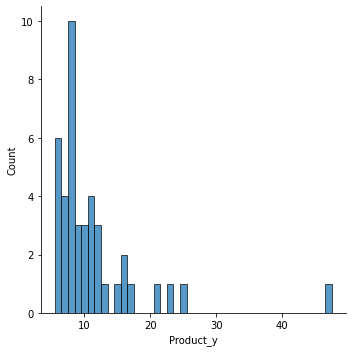

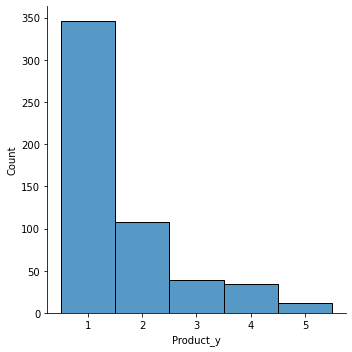

In [60]:
#sns.displot(dfmerge1['Product_y'], discrete= True)
sns.displot(dfmerge1[dfmerge1['Product_y']>5]['Product_y'], discrete=True)
sns.displot(dfmerge1[dfmerge1['Product_y']<=5]['Product_y'], discrete=True)

*Product_y column contains number of products bought at a time by each customer*

The sale distribution of bulk buyers shown above, assuming people buying more than 5 units to be bulk buyers in this case. The first graph shows distribution of bulk buyers and the second shows customers buying in less than target value 5.


**Conclusion**

* PERSON_310 and PERSON_522 found to be topmost bulk buyers
* 88 Bulk buying customers found
* highest frequency being 47
* PERSON_1 and PERSON_251 found to be bottommost buyers
* first graph shows only 1 buyer with above 40 units, most buyers lying between 5 to 25 units and very less of them between 20 and 30 units.
* in the second graph, we see most buyers with 1 unit

It can be said that most of the customers are individual buyers but a fair crowd does belong to bulk buyers.

### 10. Who are the customers buying in less quantity?

Getting smart about marketing strategies by understanding customer behaviour has become necessary now. Few people are loyal to only one channel but this can be affected by other factors too, be it their rural location, privacy concerns, pricing, etc. Such detailed infromation will help in providing a cohesive and delighted experience to customer to gain loyalty and popularity.


In [61]:
#customers buying one at a time
df1[df1['Product'].values == 1].head()

,Product
Transaction Date,
2021-03-01 00:47:26,1
2021-03-01 02:04:07,1
2021-03-01 09:10:43,1
2021-03-01 09:49:48,1
2021-03-01 12:02:00,1


### 11. What time should we display advertisements to maximize likelihood of customer's buying products?

To answer this, we need to aggregate the data in 24 hours distribution. We need to extract hours from Transaction Date and group the products by hours, counting all of them. Visualising the resulting data, we can answer the given question.

In [62]:
df1 = pd.DataFrame(df)

In [63]:
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')

In [64]:
df1['Hour'] = df1['Transaction Date'].dt.hour

In [65]:
df1['Date'] = df1['Transaction Date'].dt.date

In [66]:
#most selling hour overall
df1[['Hour','Product']].groupby(['Hour']).count()

,Product
Hour,
0,17
1,4
2,3
3,1
5,3
6,2
7,6
8,10
9,14


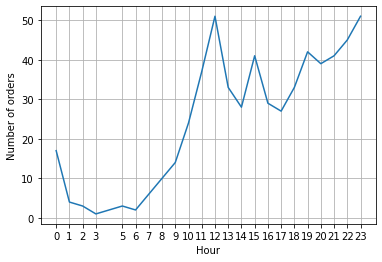

In [67]:
df2 = df1.groupby(['Hour'])['Product'].count()
hours = [hour for hour, df in df1.groupby(['Hour'])]
plt.plot(hours, df2)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

There are approximately 2 peaks at the data. They are 12 (12 PM) and 23 (11 PM). 

**Conclusion**

* From this data, we can advertise product right before 12 PM and/or 11 PM. It could be around 11.30 AM and 10.30 PM.
* A spike can be seen from 6 AM to 12 PM, which could mean that most of the most of the buyers belong to the student class, and the spike from 8 PM to 12 AM could point to the working class of people.

#### 

### 12. What class of society does the most customers belong to?

This question can be answered using hourly sale comparison for each day of the week. Assuming that the working class is more likely to buy products late at night and during the weekends while the student class is more flexible on timing and could afford to give evening timings to such sale, throughout the week.
For this, we would group number of products sold on hourly basis for each day, and then visualize it using facetgrid to understand the data better.

In [69]:
#most selling hour on each day
group = df1.groupby(['Date', 'Hour']).agg({'Product':['count']})
group

Product
                  count
Date       Hour        
2021-03-01 0          1
           2          1
           9          2
           10         1
           11         1
...                 ...
2021-03-07 19         8
           20        10
           21        17
           22        12
           23        21

[125 rows x 1 columns]

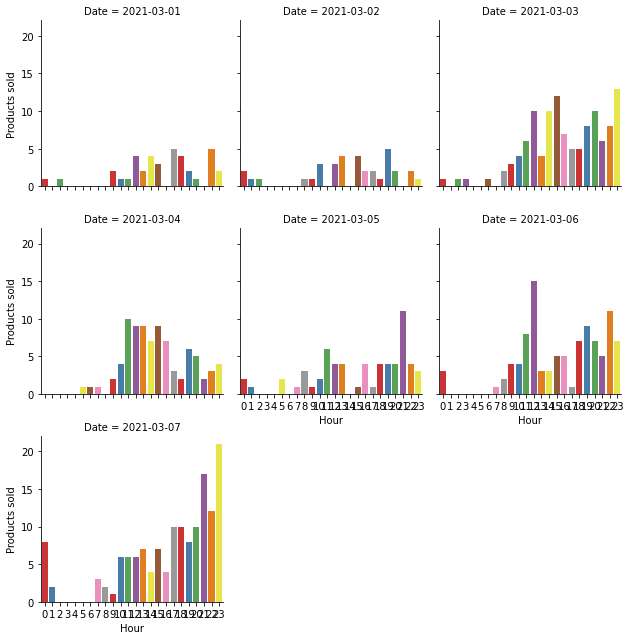

In [70]:
g = sns.FacetGrid(data=df1.groupby(['Date', 'Hour']).Product.count().to_frame(name='Products sold').reset_index(),col='Date',col_wrap=3, palette='Set3')
g.map(sns.barplot, 'Hour', 'Products sold', order=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], palette='Set1')

Above we can see that the highest sales occur on weekends,i.e, the 6th and 7th day and that too after 7/8 PM mostly. During the weekdays, sales begin to rise after 11 PM.
We can assume that a fair amount of crowd belong to the working class, but most of them are students.
Understanding customer behaviour can benefit to planning better marketing strategies and this data will contribute to that.

### 13.What Products Are Most Often Sold Together?

Grouping the products by Transaction Date, we are able to find what prodcuts often sold together.  Duplicate values of Transaction Date can be found using duplicated method and join values from two rows using transform to group products from same timestamps. Now, we will drop the duplicated values that have been formed after the previous step. To count the combination of products we are going to use itertools and collections libraries.

In [71]:
df1 = pd.DataFrame(df)

In [72]:
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')

In [73]:
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')

In [74]:
#no duplicate transaction dates
df1 = df1[df1['Transaction Date'].duplicated(keep=False)]

df1['Group'] = df1.groupby('Transaction Date')['Product'].transform(lambda x: ','.join(x))

df2 = df1[['Transaction Date','Group']].drop_duplicates()

df2.reset_index()

#products sold together
from itertools import combinations
from collections import Counter

count=Counter()

for row in df2['Group']:
    rowL = row.split(',')
    count.update(Counter(combinations(rowL,2)))   #count n products together
    
count

Counter({('PRODUCT_34', 'PRODUCT_86'): 2,
         ('PRODUCT_34', 'PRODUCT_57'): 4,
         ('PRODUCT_34', 'PRODUCT_89'): 3,
         ('PRODUCT_86', 'PRODUCT_57'): 4,
         ('PRODUCT_86', 'PRODUCT_89'): 5,
         ('PRODUCT_57', 'PRODUCT_89'): 2,
         ('PRODUCT_34', 'PRODUCT_66'): 10,
         ('PRODUCT_34', 'PRODUCT_58'): 5,
         ('PRODUCT_34', 'PRODUCT_83'): 6,
         ('PRODUCT_66', 'PRODUCT_58'): 8,
         ('PRODUCT_66', 'PRODUCT_83'): 9,
         ('PRODUCT_58', 'PRODUCT_83'): 6,
         ('PRODUCT_63', 'PRODUCT_90'): 7,
         ('PRODUCT_63', 'PRODUCT_27'): 18,
         ('PRODUCT_63', 'PRODUCT_5'): 1,
         ('PRODUCT_90', 'PRODUCT_27'): 6,
         ('PRODUCT_90', 'PRODUCT_5'): 1,
         ('PRODUCT_27', 'PRODUCT_5'): 1,
         ('PRODUCT_5', 'PRODUCT_34'): 4,
         ('PRODUCT_84', 'PRODUCT_27'): 6,
         ('PRODUCT_63', 'PRODUCT_75'): 6,
         ('PRODUCT_27', 'PRODUCT_75'): 4,
         ('PRODUCT_27', 'PRODUCT_25'): 3,
         ('PRODUCT_26', 'PRODUCT_24'

We can count the 3 or more product bundle by just changing the count.update index to that number, say 3.

In [75]:
#products often sold together
count.most_common(10)

[(('PRODUCT_63', 'PRODUCT_27'), 18),
 (('PRODUCT_85', 'PRODUCT_49'), 13),
 (('PRODUCT_85', 'PRODUCT_61'), 12),
 (('PRODUCT_12', 'PRODUCT_49'), 11),
 (('PRODUCT_12', 'PRODUCT_61'), 11),
 (('PRODUCT_85', 'PRODUCT_62'), 11),
 (('PRODUCT_62', 'PRODUCT_49'), 11),
 (('PRODUCT_62', 'PRODUCT_61'), 11),
 (('PRODUCT_43', 'PRODUCT_49'), 11),
 (('PRODUCT_43', 'PRODUCT_61'), 11)]

Above we can see that the most pften sold products are 'PRODUCT_63'and 'PRODUCT_27' with 18 transactions.

**Conclusion**

* combinations of ('PRODUCT_63', 'PRODUCT_27') , ('PRODUCT_85', 'PRODUCT_49') and ('PRODUCT_85', 'PRODUCT_61') are in most demand
* This insight can be used to recommend similar products to customers on basis of in-demand combinations.
* It can also be useful in introducing new offers on buying certain combination of products to increase sales


### 14. How much time did the market took in establishing?

* The first transaction of each customer would give us an idea about the time that the e-product sale takes in establishing itself to help monitor pre sale access offers or advertisements.
* Other than that, the first transaction's timestamp, be it the last day or the first, could help offer last minute discount offers on products before the sale ends.
* All this would add to defining probable goals and estimates for the future sale.

### 15. Customer Lifetime

This information could help understand customer behaviour and benefit to marketing strategies. People spending maximum time on sale could be approached more often with personalised offers.

To achieve this,
* A new column containing count of products bought by each customer is declared
* get first and last transaction for each customer during the week
* performing difference between the transaction intervals will give required customer lifetime

In [76]:
df1 = pd.DataFrame(df)
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')
df1['Quantity'] = df1.groupby(['Name'])['Product'].transform('count')


df1['firstTransaction'] = df1.groupby(['Name'])['Transaction Date'].transform('min')
df1['lastTransaction'] = df1.groupby(['Name'])['Transaction Date'].transform('max')

df1 = df1.sort_values(by='Quantity', ascending=False)
df1 = df1.drop_duplicates(subset='Name')
df1 = df1.drop(['Product','Transaction Date'], axis = 1)


In [77]:
df1

,Name,Email,mailName,Hour,Date,Quantity,firstTransaction,lastTransaction
328,PERSON_310,PERSON_310@gmail.com,gmail,21,2021-03-05,47,2021-03-05 21:49:46,2021-03-05 21:49:46
353,PERSON_330,PERSON_330@gmail.com,gmail,11,2021-03-06,32,2021-03-06 11:37:18,2021-03-06 19:51:49
521,PERSON_470,PERSON_470@gmail.com,gmail,20,2021-03-07,31,2021-03-07 19:28:52,2021-03-07 22:49:24
576,PERSON_522,PERSON_522@gmail.com,gmail,23,2021-03-07,25,2021-03-07 23:53:03,2021-03-07 23:53:03
578,PERSON_523,PERSON_523@gmail.com,gmail,23,2021-03-07,22,2021-03-07 23:55:01,2021-03-07 23:58:24
...,...,...,...,...,...,...,...,...
494,PERSON_451,PERSON_451@gmail.com,gmail,17,2021-03-07,1,2021-03-07 17:11:17,2021-03-07 17:11:17
248,PERSON_238,PERSON_238@gmail.com,gmail,16,2021-03-04,1,2021-03-04 16:48:38,2021-03-04 16:48:38
250,PERSON_240,PERSON_240@gmail.com,gmail,17,2021-03-04,1,2021-03-04 17:12:06,2021-03-04 17:12:06
251,PERSON_241,PERSON_241@gmail.com,gmail,17,2021-03-04,1,2021-03-04 17:27:18,2021-03-04 17:27:18


In [78]:
df1 = df1[df1['lastTransaction']!=df1['firstTransaction']]
df1['Lifetime'] = df1['lastTransaction'] - df1['firstTransaction']
df1['Lifetime (in hours)'] = df1['Lifetime']/pd.Timedelta(hours=1)

df1 = df1.sort_values(by='Lifetime (in hours)', ascending=False)

<ipython-input-78-146f0c7d1476>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Lifetime'] = df1['lastTransaction'] - df1['firstTransaction']
<ipython-input-78-146f0c7d1476>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Lifetime (in hours)'] = df1['Lifetime']/pd.Timedelta(hours=1)


In [79]:
res = df1.head(10)

In [80]:
df1

,Name,Email,mailName,Hour,Date,Quantity,firstTransaction,lastTransaction,Lifetime,Lifetime (in hours)
563,PERSON_24,PERSON_24@kamalmotors.co.in,kamalmotors,23,2021-03-07,2,2021-03-01 17:53:28,2021-03-07 23:05:44,6 days 05:12:16,149.204444
63,PERSON_62,PERSON_62@gmail.com,gmail,19,2021-03-02,8,2021-03-02 19:32:19,2021-03-07 19:46:23,5 days 00:14:04,120.234444
492,PERSON_74,PERSON_74@gmail.com,gmail,16,2021-03-07,12,2021-03-03 03:01:16,2021-03-07 16:35:21,4 days 13:34:05,109.568056
321,PERSON_8,PERSON_8@gmail.com,gmail,21,2021-03-05,16,2021-03-01 12:31:10,2021-03-05 21:06:01,4 days 08:34:51,104.580833
478,PERSON_75,PERSON_75@gmail.com,gmail,14,2021-03-07,11,2021-03-03 06:11:37,2021-03-07 14:16:50,4 days 08:05:13,104.086944
309,PERSON_11,PERSON_11@gmail.com,gmail,18,2021-03-05,2,2021-03-01 13:15:39,2021-03-05 18:39:24,4 days 05:23:45,101.395833
571,PERSON_156,PERSON_156@gmail.com,gmail,23,2021-03-07,3,2021-03-03 20:53:54,2021-03-07 23:29:48,4 days 02:35:54,98.598333
5,PERSON_6,PERSON_6@gmail.com,gmail,11,2021-03-01,5,2021-03-01 11:06:34,2021-03-05 11:40:27,4 days 00:33:53,96.564722
482,PERSON_181,PERSON_181@gmail.com,gmail,15,2021-03-07,13,2021-03-03 23:59:00,2021-03-07 15:06:32,3 days 15:07:32,87.125556
54,PERSON_53,PERSON_53@gmail.com,gmail,15,2021-03-02,4,2021-03-02 15:10:07,2021-03-05 22:06:59,3 days 06:56:52,78.947778


[Text(0, 0, 'PERSON_24'),
 Text(1, 0, 'PERSON_62'),
 Text(2, 0, 'PERSON_74'),
 Text(3, 0, 'PERSON_8'),
 Text(4, 0, 'PERSON_75'),
 Text(5, 0, 'PERSON_11'),
 Text(6, 0, 'PERSON_156'),
 Text(7, 0, 'PERSON_6'),
 Text(8, 0, 'PERSON_181'),
 Text(9, 0, 'PERSON_53')]

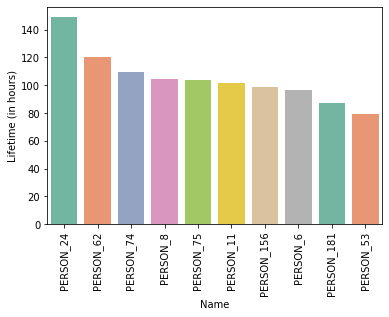

In [81]:
pl = sns.barplot(x = 'Name', y= 'Lifetime (in hours)', data=res, palette = 'Set2')
pl.set_xticklabels(pl.get_xticklabels(),rotation=90)

**Conclusion-**

* **Person_24** has the highest lifetime, which is 6 days and 5 hours , almost for over the sale week.
* Person_62, Person_74, Person_8 and Person_75 are among the loyal customers with maximum time spent on the sale.

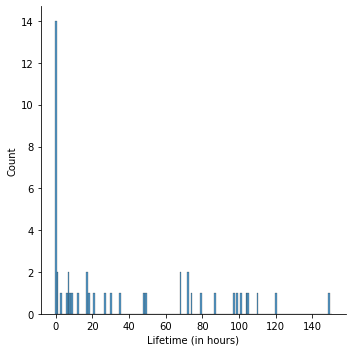

In [82]:
sns.displot(df1['Lifetime (in hours)'], discrete= True)

*The above graph shows customer lifetime distribution in hours. Here we can see that maximum customers bought once while a fair amount of them lasted for the week until the sale.*

<AxesSubplot:xlabel='firstTransaction', ylabel='Lifetime (in hours)'>

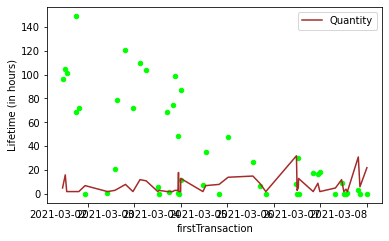

In [83]:
ax = df1.plot.line(x = 'firstTransaction', y = 'Quantity', color = 'brown')
df1.plot.scatter(x = 'firstTransaction', y = 'Lifetime (in hours)', color = 'lime', ax=ax)

### 16. Fastest selling product

Getting the first and last transaction timestamps for each product and then taking out their difference would give the time it took the units to get sold. Dividing units of each product by this time difference would give selling rates in unit per hour. This is done on topmost selling products found earlier since we have no data for their monetary values.


In [84]:
df1 = pd.DataFrame(df)
df1['Transaction Date'] =  pd.to_datetime(df1['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
df1 = df1.assign(Product = df1.Product.str.split(",")).explode('Product')
df1['Units'] = df1.groupby(['Product'])['Name'].transform('count')

df1['firstTransaction'] = df1.groupby(['Product'])['Transaction Date'].transform('min')
df1['lastTransaction'] = df1.groupby(['Product'])['Transaction Date'].transform('max')
df1 = df1.sort_values(by='Units', ascending=False)

df1 = df1.drop_duplicates(subset='Product')
df1 = df1.drop(['Name','Transaction Date','Email'], axis = 1)

df1 = df1.head(10)

In [85]:
df1 = df1[df1['lastTransaction']!=df1['firstTransaction']]
df1['diff (in hours)'] = (df1['lastTransaction'] - df1['firstTransaction'])/pd.Timedelta(hours=1)
df1['Selling rate'] = df1['Units']/df1['diff (in hours)']

df1 = df1.sort_values(by='Selling rate', ascending=False)
df1

,Product,mailName,Hour,Date,Units,firstTransaction,lastTransaction,diff (in hours),Selling rate
0,PRODUCT_75,gmail,0,2021-03-01,121,2021-03-01 00:47:26,2021-03-07 23:59:26,167.200000,0.723684
320,PRODUCT_63,gmail,21,2021-03-05,97,2021-03-01 09:10:43,2021-03-07 23:59:26,158.811944,0.610785
429,PRODUCT_12,gmail,22,2021-03-06,52,2021-03-03 14:03:26,2021-03-07 23:58:24,105.916111,0.490955
161,PRODUCT_27,gmail,20,2021-03-03,76,2021-03-01 12:31:10,2021-03-07 23:53:03,155.364722,0.489172
307,PRODUCT_74,gmail,18,2021-03-05,49,2021-03-03 15:30:30,2021-03-07 23:58:24,104.465000,0.469057
282,PRODUCT_25,gmail,8,2021-03-05,59,2021-03-01 14:37:16,2021-03-07 23:53:03,153.263056,0.384959
396,PRODUCT_34,gmail,18,2021-03-06,44,2021-03-01 10:56:46,2021-03-07 23:59:19,157.042500,0.280179
475,PRODUCT_68,gmail,13,2021-03-07,32,2021-03-01 23:19:15,2021-03-07 23:53:03,144.563333,0.221356
555,PRODUCT_57,gmail,22,2021-03-07,30,2021-03-01 10:56:46,2021-03-07 23:33:50,156.617778,0.191549
351,PRODUCT_85,gmail,11,2021-03-06,26,2021-03-01 15:48:41,2021-03-07 23:58:24,152.161944,0.170871


<ipython-input-86-ca9b003bec78>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl.set_xticklabels(pl.get_xticklabels(),rotation=90)


[Text(0.0, 0, ''),
 Text(0.1, 0, ''),
 Text(0.2, 0, ''),
 Text(0.30000000000000004, 0, ''),
 Text(0.4, 0, ''),
 Text(0.5, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.7000000000000001, 0, ''),
 Text(0.8, 0, '')]

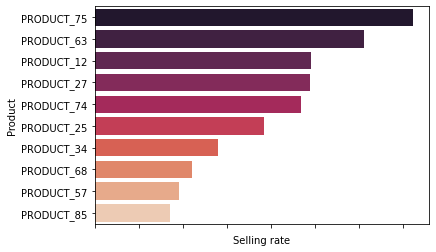

In [86]:
pl = sns.barplot(x = 'Selling rate', y= 'Product', data=df1, palette='rocket')
pl.set_xticklabels(pl.get_xticklabels(),rotation=90)

**Conclusion-**

* **Product_75** is the fastest selling product
* Product_63, Product_12, Product_27 and Product_74 are also among the topmost selling product based on selling rates
